In [ ]:
# 런타임 다시 시작

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from google.colab import drive
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from sklearn.cluster import KMeans

In [ ]:
# 한글 불러옴
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

!apt-get update -qq
!apt-get install fonts-nanum* -qq

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 39 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
# 나눔고딕 폰트 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_prop = fm.FontProperties(fname=font_path, size=12)
plt.rc('font', family='NanumGothic')

In [ ]:
drive.mount('/content/drive')
df =  pd.read_csv('/content/drive/MyDrive/[통계청 공모전] 음주운전/1 데이터/도연_data/분석할구별데이터.csv')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,시군구명,CCTV개수,가로등개수,버스정류소개수,음식점개수,주점개수,음식점및주점개수,주차장개수,지하철역개수,자동차소유대수,사고건수,22년 음주단속수,버스_승객_수,지하철_승객_수,버스승객수_scaled,지하철승객수_scaled,총승객수
0,강남구,306.772727,82.000000,25.409091,350.318182,55.909091,406.227273,935.409091,1.227273,11134.590909,7.409091,1998.0,102254991.0,156156645.0,1.000000,1.000000,1.000000
1,강동구,72.400000,47.350000,22.050000,156.700000,32.700000,189.400000,806.050000,0.600000,7594.700000,1.000000,524.0,28896885.0,44532905.0,0.000000,0.178010,0.089005
2,강북구,106.307692,0.000000,32.076923,177.153846,46.846154,224.000000,896.153846,0.846154,5778.230769,0.461538,545.0,58019122.0,30349973.0,0.396987,0.073567,0.235277
3,강서구,113.800000,67.500000,31.200000,207.400000,45.600000,253.000000,969.350000,0.800000,10313.050000,1.400000,893.0,55867325.0,69240377.0,0.367655,0.359954,0.363804
4,관악구,220.000000,3.047619,23.190476,161.190476,43.380952,204.571429,1005.238095,0.238095,5625.523810,0.809524,703.0,90091326.0,84730237.0,0.834188,0.474020,0.654104


In [ ]:
df.columns

Index(['시군구명', 'CCTV개수', '가로등개수', '버스정류소개수', '음식점개수', '주점개수', '음식점및주점개수',
       '주차장개수', '지하철역개수', '자동차소유대수', '사고건수', '22년 음주단속수', '버스_승객_수',
       '지하철_승객_수', '버스승객수_scaled', '지하철승객수_scaled', '총승객수'],
      dtype='object')

In [ ]:
df.describe(include = 'all')

,시군구명,CCTV개수,가로등개수,버스정류소개수,음식점개수,주점개수,음식점및주점개수,주차장개수,지하철역개수,자동차소유대수,사고건수,22년 음주단속수,버스_승객_수,지하철_승객_수,버스승객수_scaled,지하철승객수_scaled,총승객수
count,25,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,2.500000e+01,2.500000e+01,25.000000,25.000000,25.000000
unique,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,강남구,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,130.374414,42.512550,26.850799,195.825669,39.707988,235.533657,718.385496,0.627515,7323.946929,1.225271,620.440000,5.859877e+07,6.410795e+07,0.404889,0.322159,0.363524
std,NaN,75.816793,36.274652,5.877390,54.583253,11.679621,64.649177,239.043620,0.230291,1934.079734,1.456633,376.265429,1.740308e+07,3.469062e+07,0.237235,0.255460,0.216805
min,NaN,6.176471,0.000000,15.133333,127.214286,24.277778,153.000000,285.866667,0.200000,2972.764706,0.000000,255.000000,2.889688e+07,2.035975e+07,0.000000,0.000000,0.089005
25%,NaN,72.400000,4.642857,22.714286,161.190476,32.555556,192.000000,561.611111,0.500000,6235.117647,0.600000,420.000000,4.603086e+07,3.476333e+07,0.233566,0.106067,0.196645
50%,NaN,113.800000,38.062500,26.823529,182.666667,40.312500,224.000000,726.285714,0.611111,7187.125000,0.941176,521.000000,5.801912e+07,5.576151e+07,0.396987,0.260696,0.321530
75%,NaN,185.937500,67.500000,31.875000,221.823529,45.600000,256.222222,873.300000,0.777778,8399.000000,1.400000,703.000000,6.743723e+07,8.906047e+07,0.525373,0.505908,0.505405


In [ ]:
list_reg = [1,2,3,4,5,6,7,8,9,12,13,11,10]
df_reg = df.iloc[:, list_reg]
df_reg.head()

,CCTV개수,가로등개수,버스정류소개수,음식점개수,주점개수,음식점및주점개수,주차장개수,지하철역개수,자동차소유대수,버스_승객_수,지하철_승객_수,22년 음주단속수,사고건수
0,306.772727,82.000000,25.409091,350.318182,55.909091,406.227273,935.409091,1.227273,11134.590909,102254991.0,156156645.0,1998.0,7.409091
1,72.400000,47.350000,22.050000,156.700000,32.700000,189.400000,806.050000,0.600000,7594.700000,28896885.0,44532905.0,524.0,1.000000
2,106.307692,0.000000,32.076923,177.153846,46.846154,224.000000,896.153846,0.846154,5778.230769,58019122.0,30349973.0,545.0,0.461538
3,113.800000,67.500000,31.200000,207.400000,45.600000,253.000000,969.350000,0.800000,10313.050000,55867325.0,69240377.0,893.0,1.400000
4,220.000000,3.047619,23.190476,161.190476,43.380952,204.571429,1005.238095,0.238095,5625.523810,90091326.0,84730237.0,703.0,0.809524


In [ ]:
df_reg['음주운전_y'] = df_reg['22년 음주단속수'] + df_reg['사고건수']*30
df_reg.head()

<ipython-input-96-30058042c8a1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reg['음주운전_y'] = df_reg['22년 음주단속수'] + df_reg['사고건수']*30


,CCTV개수,가로등개수,버스정류소개수,음식점개수,주점개수,음식점및주점개수,주차장개수,지하철역개수,자동차소유대수,버스_승객_수,지하철_승객_수,22년 음주단속수,사고건수,음주운전_y
0,306.772727,82.000000,25.409091,350.318182,55.909091,406.227273,935.409091,1.227273,11134.590909,102254991.0,156156645.0,1998.0,7.409091,2220.272727
1,72.400000,47.350000,22.050000,156.700000,32.700000,189.400000,806.050000,0.600000,7594.700000,28896885.0,44532905.0,524.0,1.000000,554.000000
2,106.307692,0.000000,32.076923,177.153846,46.846154,224.000000,896.153846,0.846154,5778.230769,58019122.0,30349973.0,545.0,0.461538,558.846154
3,113.800000,67.500000,31.200000,207.400000,45.600000,253.000000,969.350000,0.800000,10313.050000,55867325.0,69240377.0,893.0,1.400000,935.000000
4,220.000000,3.047619,23.190476,161.190476,43.380952,204.571429,1005.238095,0.238095,5625.523810,90091326.0,84730237.0,703.0,0.809524,727.285714


In [ ]:
df_reg['버스및지하철승객수'] = df_reg['버스_승객_수'] + df_reg['지하철_승객_수']
df_reg.head()

<ipython-input-97-2bac087c5564>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reg['버스및지하철승객수'] = df_reg['버스_승객_수'] + df_reg['지하철_승객_수']


,CCTV개수,가로등개수,버스정류소개수,음식점개수,주점개수,음식점및주점개수,주차장개수,지하철역개수,자동차소유대수,버스_승객_수,지하철_승객_수,22년 음주단속수,사고건수,음주운전_y,버스및지하철승객수
0,306.772727,82.000000,25.409091,350.318182,55.909091,406.227273,935.409091,1.227273,11134.590909,102254991.0,156156645.0,1998.0,7.409091,2220.272727,258411636.0
1,72.400000,47.350000,22.050000,156.700000,32.700000,189.400000,806.050000,0.600000,7594.700000,28896885.0,44532905.0,524.0,1.000000,554.000000,73429790.0
2,106.307692,0.000000,32.076923,177.153846,46.846154,224.000000,896.153846,0.846154,5778.230769,58019122.0,30349973.0,545.0,0.461538,558.846154,88369095.0
3,113.800000,67.500000,31.200000,207.400000,45.600000,253.000000,969.350000,0.800000,10313.050000,55867325.0,69240377.0,893.0,1.400000,935.000000,125107702.0
4,220.000000,3.047619,23.190476,161.190476,43.380952,204.571429,1005.238095,0.238095,5625.523810,90091326.0,84730237.0,703.0,0.809524,727.285714,174821563.0


/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


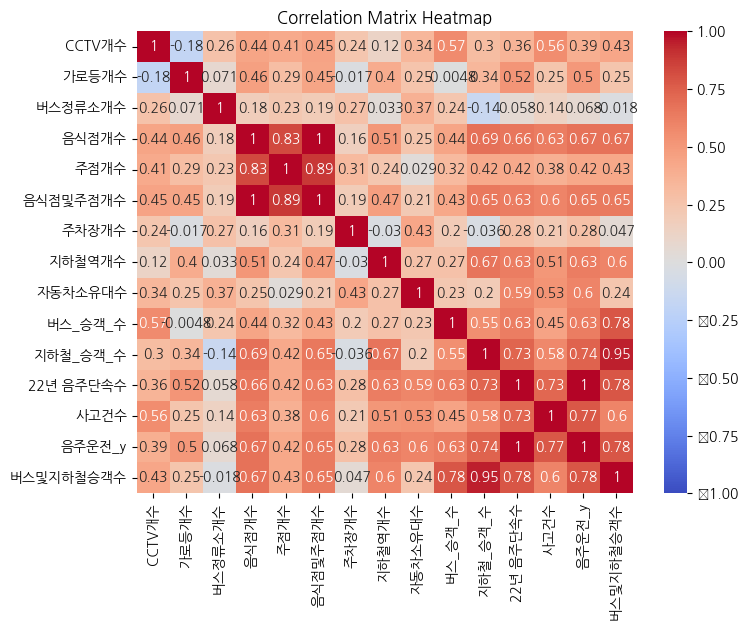

In [ ]:
# 상관 행렬 계산
corr_matrix = df_reg.corr()

# 히트맵 그리기
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
X = df_reg[['CCTV개수', '가로등개수', '버스_승객_수',
       '음식점개수', '주점개수', '주차장개수', '지하철_승객_수', '자동차소유대수']]
y = df_reg['음주운전_y']

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF 계산
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

    feature         VIF
0    CCTV개수    7.915338
1     가로등개수    4.489660
2   버스_승객_수   20.798093
3     음식점개수  123.626902
4      주점개수   74.321359
5     주차장개수   19.524269
6  지하철_승객_수   11.811429
7   자동차소유대수   25.111234


VIF 계수가 10이 넘어가면 심각하다고 판단
-> 음식점 개수 변수의 다중공선성 문제가 큼

상관관계가 유독 높게 나타나는 주점 개수와 음식점 개수를 '음식점및주점개수'로 통합함

In [ ]:
X = df_reg[['CCTV개수', '가로등개수', '음식점및주점개수', '주차장개수', '자동차소유대수','버스및지하철승객수']]
y = df_reg['음주운전_y']

In [ ]:
# VIF 계산
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

     feature        VIF
0     CCTV개수   7.481308
1      가로등개수   4.330293
2   음식점및주점개수  30.246676
3      주차장개수  13.600066
4    자동차소유대수  18.736377
5  버스및지하철승객수  15.381909


/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


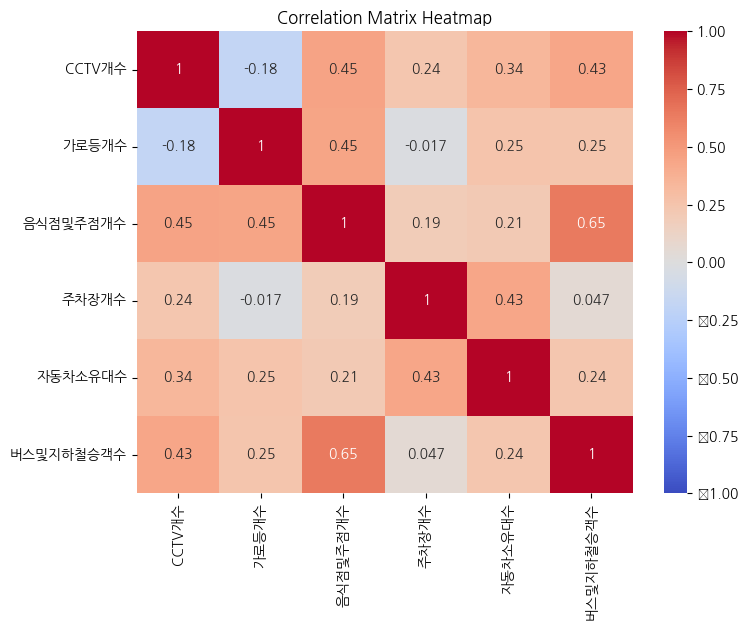

In [ ]:
# 상관 행렬 계산
corr_matrix = X.corr()

# 히트맵 그리기
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

# 정규화(표준화) 객체 생성
scaler = StandardScaler()

# 독립 변수들에 대해 정규화(표준화) 적용
X_scaled = scaler.fit_transform(X)

# 정규화 후 데이터 확인
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
print(X_scaled_df.describe())

             CCTV개수         가로등개수      음식점및주점개수         주차장개수       자동차소유대수  \
count  2.500000e+01  2.500000e+01  2.500000e+01  2.500000e+01  2.500000e+01   
mean   1.243450e-16  2.242651e-16  1.376677e-16  8.326673e-17 -1.665335e-17   
std    1.020621e+00  1.020621e+00  1.020621e+00  1.020621e+00  1.020621e+00   
min   -1.671912e+00 -1.196130e+00 -1.302964e+00 -1.846683e+00 -2.296134e+00   
25%   -7.804325e-01 -1.065499e+00 -6.872687e-01 -6.693640e-01 -5.745791e-01   
50%   -2.231193e-01 -1.252063e-01 -1.820826e-01  3.373077e-02 -7.220142e-02   
75%    7.479720e-01  7.030449e-01  3.266117e-01  6.614230e-01  5.673093e-01   
max    2.374616e+00  2.160837e+00  2.694751e+00  1.969842e+00  2.010890e+00   

          버스및지하철승객수  
count  2.500000e+01  
mean   2.664535e-17  
std    1.020621e+00  
min   -1.255461e+00  
25%   -7.212607e-01  
50%   -2.659580e-01  
75%    7.405942e-01  
max    2.974234e+00  


In [ ]:
# 상수항 추가
X_scaled = sm.add_constant(X_scaled)

# 회귀 모델 적합
model = sm.OLS(y, X_scaled).fit()

# 결과 요약
print(model.summary())

# X:[['CCTV개수', '가로등개수', '음식점및주점개수', '주차장개수', '자동차소유대수','버스및지하철승객수']]

                            OLS Regression Results                            
Dep. Variable:                 음주운전_y   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     19.02
Date:                Fri, 12 Jul 2024   Prob (F-statistic):           6.86e-07
Time:                        12:17:21   Log-Likelihood:                -160.40
No. Observations:                  25   AIC:                             334.8
Df Residuals:                      18   BIC:                             343.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        657.1981     34.876     18.844      0.0

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# 정규화(표준화) 객체 생성
scaler = MinMaxScaler()

# 독립 변수들에 대해 정규화(표준화) 적용
X_scaled2 = scaler.fit_transform(X)

# 정규화 후 데이터 확인
X_scaled_df2 = pd.DataFrame(X_scaled2, columns=X.columns)
print(X_scaled_df2.describe())

          CCTV개수      가로등개수   음식점및주점개수      주차장개수    자동차소유대수  버스및지하철승객수
count  25.000000  25.000000  25.000000  25.000000  25.000000  25.000000
mean    0.413172   0.356313   0.325927   0.483865   0.533114   0.296821
std     0.252221   0.304031   0.255301   0.267421   0.236967   0.241299
min     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000
25%     0.220307   0.038913   0.154012   0.308479   0.399709   0.126298
50%     0.358033   0.319015   0.280381   0.492703   0.516350   0.233942
75%     0.598015   0.565741   0.407627   0.657170   0.664831   0.471915
max     1.000000   1.000000   1.000000   1.000000   1.000000   1.000000


In [ ]:
# 상수항 추가
X_scaled2 = sm.add_constant(X_scaled2)

# 회귀 모델 적합
model = sm.OLS(y, X_scaled2).fit()

# 결과 요약
print(model.summary())

# X:[['CCTV개수', '가로등개수', '음식점및주점개수', '주차장개수', '자동차소유대수','버스_승객_수','지하철_승객_수']]

                            OLS Regression Results                            
Dep. Variable:                 음주운전_y   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     19.02
Date:                Fri, 12 Jul 2024   Prob (F-statistic):           6.86e-07
Time:                        12:17:21   Log-Likelihood:                -160.40
No. Observations:                  25   AIC:                             334.8
Df Residuals:                      18   BIC:                             343.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -183.0687    106.039     -1.726      0.1

In [ ]:
# 랜덤포레스트
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

# 모델 피팅1
model.fit(X, y)

# 피처 중요도 확인
importances = model.feature_importances_
feature_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)

# 피처 중요도 출력
print("피처 중요도:\n", feature_importances)

피처 중요도:
 버스및지하철승객수    0.286093
자동차소유대수      0.261486
CCTV개수       0.177240
가로등개수        0.135979
음식점및주점개수     0.118049
주차장개수        0.021152
dtype: float64


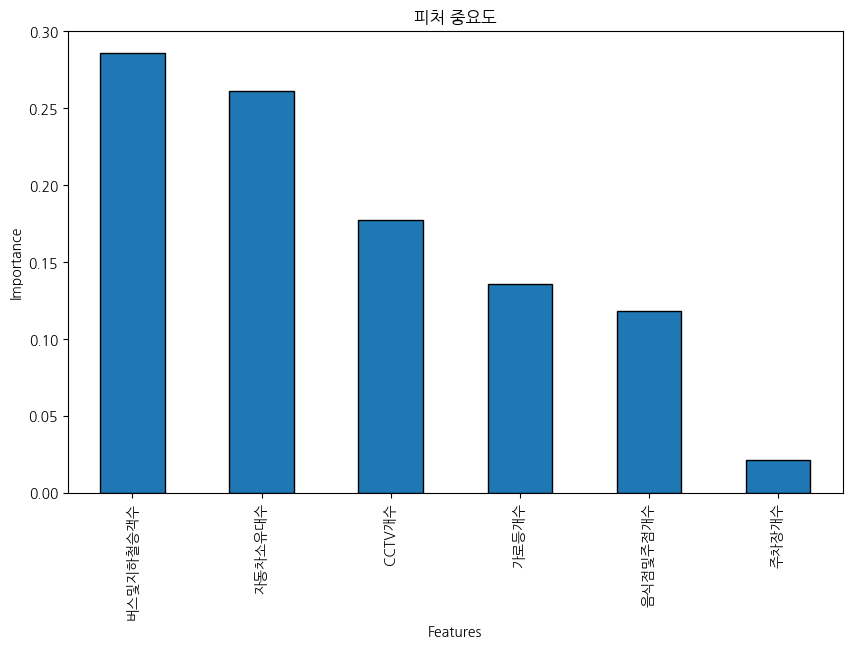

In [ ]:
# 피처 중요도를 막대 그래프로 시각화
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar', edgecolor='k')
plt.title('피처 중요도')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

In [ ]:
X = df_reg[['가로등개수', '음식점및주점개수', '자동차소유대수','CCTV개수','지하철역개수']]
y = df_reg['음주운전_y']

In [ ]:
from sklearn.preprocessing import StandardScaler

# 정규화(표준화) 객체 생성
scaler = StandardScaler()

# 독립 변수들에 대해 정규화(표준화) 적용
X_scaled = scaler.fit_transform(X)

# 정규화 후 데이터 확인
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
print(X_scaled_df.describe())

              가로등개수      음식점및주점개수       자동차소유대수        CCTV개수        지하철역개수
count  2.500000e+01  2.500000e+01  2.500000e+01  2.500000e+01  2.500000e+01
mean   2.242651e-16  1.376677e-16 -1.665335e-17  1.243450e-16  2.150363e-16
std    1.020621e+00  1.020621e+00  1.020621e+00  1.020621e+00  1.020621e+00
min   -1.196130e+00 -1.302964e+00 -2.296134e+00 -1.671912e+00 -1.894693e+00
25%   -1.065499e+00 -6.872687e-01 -5.745791e-01 -7.804325e-01 -5.651296e-01
50%   -1.252063e-01 -1.820826e-01 -7.220142e-02 -2.231193e-01 -7.269854e-02
75%    7.030449e-01  3.266117e-01  5.673093e-01  7.479720e-01  6.659480e-01
max    2.160837e+00  2.694751e+00  2.010890e+00  2.374616e+00  2.658055e+00


In [ ]:
# 상수항 추가
X_scaled = sm.add_constant(X_scaled)

# 회귀 모델 적합
model = sm.OLS(y, X_scaled).fit()

# 결과 요약
print(model.summary())

# X: [['CCTV개수', '가로등개수', '음식점및주점개수', '자동차소유대수','버스및지하철승객수']]

                            OLS Regression Results                            
Dep. Variable:                 음주운전_y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     10.88
Date:                Fri, 12 Jul 2024   Prob (F-statistic):           4.73e-05
Time:                        12:18:51   Log-Likelihood:                -168.42
No. Observations:                  25   AIC:                             348.8
Df Residuals:                      19   BIC:                             356.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        657.1981     46.794     14.045      0.0

In [ ]:
# 랜덤포레스트
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

# 모델 피팅1
model.fit(X, y)

# 피처 중요도 확인
importances = model.feature_importances_
feature_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)

# 피처 중요도 출력
print("피처 중요도:\n", feature_importances)

피처 중요도:
 자동차소유대수     0.271847
음식점및주점개수    0.265488
지하철역개수      0.201547
CCTV개수      0.139617
가로등개수       0.121501
dtype: float64


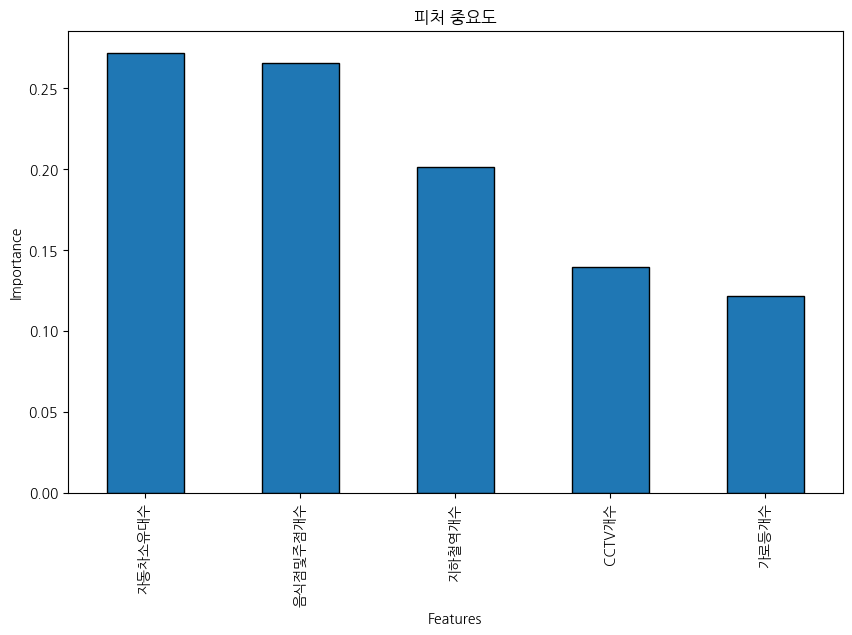

In [ ]:
# 피처 중요도를 막대 그래프로 시각화
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar', edgecolor='k')
plt.title('피처 중요도')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

음식점및주점개수, 버스및지하철승객수 상관관계로 다중공선성 보이며,
버스및지하철승객수변수 제외시 음식점 및 주점개수 pvalue값낮아짐

전반적으로 구별로 통합함으로써 x변수들간 상관관계가 너무 높아진 문제